In [5]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#!pip install pandas
%pwd

'C:\\Users\\rb\\Downloads'

In [6]:
############################
#####  SET THESE VARS  #####
############################
target_size  = (128, 128)
input_shape  = (128, 128, 3)
batch_size   = 32
epoch_count  = 25
LINUX = False

if LINUX:
    PathToFiles  = '/tf/C/Desktop/14cat'
else:
    PathToFiles  = r'C:\Users\rb\OneDrive - Balaian\School\Capstone\14cat'

print(PathToFiles)

print('thank you for setting vars')

C:\Users\rb\OneDrive - Balaian\School\Capstone\14cat
thank you for setting vars


In [7]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from numpy import array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

print('Tensorflow version: ', tf.__version__)
print('Keras version     : ', keras.__version__)

# GPU SETUP (YOU MAY NEED TO SKIP THIS) 
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)
tf.config.list_physical_devices()

# FOR DEBUG of GPU USE SET TO TRUE
tf.debugging.set_log_device_placement(False)

Tensorflow version:  2.5.0-dev20201123
Keras version     :  2.5.0
Num GPUs Available:  1


In [8]:
def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(history.epoch, np.array(history.history['accuracy']), label='Train Accuracy')
  plt.plot(history.epoch, np.array(history.history['val_accuracy']), label = 'Val Accuracy')
  plt.legend()
  plt.ylim([0, 1])

In [9]:
if LINUX:
    train_path = PathToFiles + '/train'
    valid_path = PathToFiles + '/valid'
else:
    train_path = PathToFiles + '\\train'
    valid_path = PathToFiles + '\\valid'

train_datagen = ImageDataGenerator(
    rescale = 1.0 / 255.0,     
    rotation_range = 90, # rotation
    horizontal_flip = True) # horizontal flip

valid_datagen = ImageDataGenerator(
    rescale = 1.0 / 255.0)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = target_size,
    batch_size = batch_size,
    class_mode = "categorical",
    seed = 123)

valid_generator = valid_datagen.flow_from_directory(
    valid_path,
    target_size = target_size,
    batch_size = batch_size,
    class_mode = "categorical",
    seed = 123)

model = Sequential()

model.add(Conv2D(32, (5, 5), padding = 'same', input_shape = input_shape))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(64, (5, 5)))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(96, (3, 3)))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(128, (3, 3)))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(160, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(192,(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(256, (3, 3)))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Flatten())

model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(14))              
model.add(Activation('softmax'))

model.compile(loss      =  'categorical_crossentropy',
              optimizer =  'adam',
              metrics   = ['categorical_accuracy', 
                           'accuracy'])

model.summary()

Found 36806 images belonging to 14 classes.
Found 3197 images belonging to 14 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
activation (Activation)      (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 124, 124, 64)      51264     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 62, 62, 64)        256       
___________________________________

Epoch 1/25
1151/1151 [==============================] - 193s 163ms/step - loss: 1.9307 - categorical_accuracy: 0.3365 - accuracy: 0.3365 - val_loss: 1.7940 - val_categorical_accuracy: 0.3700 - val_accuracy: 0.3700
Epoch 2/25
1151/1151 [==============================] - 179s 156ms/step - loss: 1.1417 - categorical_accuracy: 0.5534 - accuracy: 0.5534 - val_loss: 1.3093 - val_categorical_accuracy: 0.5133 - val_accuracy: 0.5133
Epoch 3/25
1151/1151 [==============================] - 174s 151ms/step - loss: 0.9360 - categorical_accuracy: 0.6176 - accuracy: 0.6176 - val_loss: 1.0127 - val_categorical_accuracy: 0.5915 - val_accuracy: 0.5915
Epoch 4/25
1151/1151 [==============================] - 174s 151ms/step - loss: 0.8416 - categorical_accuracy: 0.6512 - accuracy: 0.6512 - val_loss: 1.4990 - val_categorical_accuracy: 0.4589 - val_accuracy: 0.4589
Epoch 5/25
1151/1151 [==============================] - 176s 153ms/step - loss: 0.7819 - categorical_accuracy: 0.6750 - accuracy: 0.6750 - val_l

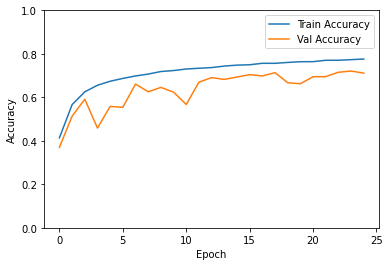

In [10]:
history = model.fit(train_generator, epochs = epoch_count, validation_data = valid_generator)

plot_history(history)